In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

path = 'Хакатон/'

In [8]:
# encoding definition
with open('Хакатон/Х_Студенты.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

print(encoding)

windows-1251


In [5]:
import os

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        tmp = pd.read_csv(path+filename, encoding='windows-1251', sep=';').to_csv(path+filename, encoding='utf-8', index=False)

/tmp/ipykernel_1231005/1361548196.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(path+filename, encoding='windows-1251', sep=';').to_csv(path+filename, encoding='utf-8', index=False)


In [2]:
tasks_df = pd.read_csv(path+'Х_Здания.csv')
hardware_df = pd.read_csv(path+'Х_Оборудование_ИТ.csv')
harware_scientific_df = pd.read_csv(path+'Х_Оборудование_научное.csv')
rating_df = pd.read_csv(path+'Х_Рейтинг НПР.csv')
estimates_df = pd.read_csv(path+'Х_Сметы.csv')
employee_df = pd.read_csv(path+'Х_Сотрудники.csv')
students_df = pd.read_csv(path+'Х_Студенты.csv')
grade_df = pd.read_csv(path+'Х_Успеваемость.csv')

/tmp/ipykernel_6751/4162565935.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  grade_df = pd.read_csv(path+'Х_Успеваемость.csv')


In [20]:
chunk_size = int(grade_df.shape[0] / 3)

# def split_df(path, chunk_size):
#     df = pd.read_csv(path, chunksize=chunk_size)
#     num_chunks = len(df) // chunk_size + 1
#     chunks = [df[i * chunk_size: (i + 1) * chunk_size] for i in range(num_chunks)]
#     return chunks
# chunk_size

for i, chunk in enumerate(pd.read_csv(path + 'Х_Успеваемость.csv', chunksize=chunk_size)):
    chunk.to_csv('Х_Успеваемость{}.csv'.format(i), index=False)

/tmp/ipykernel_59008/2716343271.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path + 'Х_Успеваемость.csv', chunksize=chunk_size)):
/tmp/ipykernel_59008/2716343271.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path + 'Х_Успеваемость.csv', chunksize=chunk_size)):


In [3]:
tmp = pd.read_csv(path + 'Х_Успеваемость0.csv')
tmp['Балл сдачи'].mean()

/tmp/ipykernel_6751/2900652377.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(path + 'Х_Успеваемость0.csv')


29.616860251221947

In [4]:
students_df['Институт'].value_counts()

Институт
Юридический факультет                                             1566
Институт вычислительной математики и информационных технологий     737
Отделение педагогики                                               537
Институт фундаментальной медицины и биологии                       532
Подготовительный факультет для иностранных учащихся                530
                                                                  ... 
Автомеханический колледж                                             7
Общеэкономическое отделение                                          7
Гуманитарное отделение                                               6
Филологический факультет                                             4
Колледж автоматизации и прогрессивных технологий                     1
Name: count, Length: 92, dtype: int64

In [8]:
n = students_df['Институт'].isna().sum()
al = students_df.shape[0]
print(f'Пустые институты {n / al * 100} %')

Пустые институты 9.75158414175966 %


In [20]:
un_name = students_df['Имя'].unique().shape[0]
un_name_gade = grade_df['Студент'].unique().shape[0]
print(f'Количество уникальных имен студентов вообще {un_name}, количество уникальных имен студентов в успеваемости {un_name_gade}')

Количество уникальных имен студентов вообще 2852, количество уникальных имен студентов в успеваемости 1686


In [24]:
print(f'Количество студентов вообще {students_df.shape[0]}, количество студентов в успеваемости {grade_df.shape[0]}')

Количество студентов вообще 17833, количество студентов в успеваемости 1048575


In [27]:
students_df.columns, grade_df.columns

(Index(['Имя', 'Пол', 'Дата рождения', 'Место рождения', 'Место жительства',
        'Год поступления', 'Группа', 'Специальность', 'Специализация',
        'Институт', 'Тип обучения', 'Квалификация', 'Категория', 'Публикации',
        'Конференции', 'Медаль', 'Олимпиады', 'Статус', 'Начало приказа',
        'Окончание приказа', 'Место окончания учебы', 'Тип школы',
        'Год окончания школы', 'Страна', 'Регион', 'Район', 'Город', 'Локация',
        'Гражданство', 'Страна гражданства', 'Причина ухода', 'Курс'],
       dtype='object'),
 Index(['Студент', 'Семестр', 'Предмет', 'Тип дисциплины', 'Часы', 'Дата сдачи',
        'Балл за семестр', 'Балл сдачи', 'Балл итоговый', 'Отметка',
        'Дисциплина/ЖТК', 'Подразделение', 'Институт', 'Очное/заочное',
        'Специальность', 'Специальность шифр', 'Группа', 'Курс', 'Категория',
        'Страна', 'Гражданство', 'КФУ/НЧФ/ЕФ', 'Отделение', 'Тип квалификации',
        'Кол-во должников'],
       dtype='object'))

In [32]:
test = pd.concat([students_df, grade_df], axis=1, join='inner')

In [31]:
test

,Имя,Пол,Дата рождения,Место рождения,Место жительства,Год поступления,Группа,Специальность,Специализация,Институт,...,Специальность шифр,Группа,Курс,Категория,Страна,Гражданство,КФУ/НЧФ/ЕФ,Отделение,Тип квалификации,Кол-во должников
0,Анастасия,ж,сен.95,КИТАЙСКАЯ НАРОДНАЯ РЕСПУБЛИКА,"КИТАЙСКАЯ НАРОДНАЯ РЕСПУБЛИКА, Китай",2020,01-Ак.от.4,Филология,Русский язык как иностранный,Высшая школа русского языка и межкультурной ко...,...,45.03.02,04.3-018,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
1,Дарья,ж,апр.96,РЕСПУБЛИКА УЗБЕКИСТАН,РЕСПУБЛИКА УЗБЕКИСТАН,2020,1351з,Экономика,не предусмотрено,Центр заочного и дистанционного обучения,...,45.03.02,04.3-017,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
2,Шерзод,м,апр.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,РОССИЙСКАЯ ФЕДЕРАЦИЯ,2020,1231110,Фундаментальная информатика и информационные т...,NaN,Институт вычислительной математики и информаци...,...,45.03.02,04.3-018,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
3,Милана,ж,апр.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, 420095, Респ. Татарстан,...",2020,20-2306Д,Реклама и связи с общественностью,Реклама и связи с общественностью в различных ...,Высшая школа журналистики и медиакоммуникаций,...,45.03.02,04.3-002а,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
4,Эльвира,ж,май.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,NaN,2020,04.3-307,Зарубежное регионоведение,Германо-российские исследования,NaN,...,45.03.02,04.3-008,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Екатерина,ж,янв.01,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан, г. Каза...",2020,14.4-090,Педагогическое образование (с двумя профилями ...,Иностранный (английский) язык и второй иностра...,NaN,...,01.03.2004,09-122,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17829,Ляйсан,ж,апр.03,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"Республика Татарстан, Казань, Толбухина, д....",2024,09-302,Астрономия,Астрофизика и космология,Институт физики,...,01.03.2002,09-113,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17830,Павел,м,апр.99,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан, г. Набе...",2019,20-2211Б,Автоматизация технологических процессов и прои...,NaN,NaN,...,09.03.2003,09-153,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17831,Гурбанмырат,м,авг.99,ТУРКМЕНИСТАН,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, г. Казань, ул. Проспект ...",2024,э410,Экономика,"Бухгалтерский учет, анализ и аудит",Центр заочного и дистанционного обучения,...,01.03.2002,09-113,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено


In [25]:
!which python

/home/dev/Projects/Programming/ML/Хакатон/venv/bin/python


In [24]:
tasks_df

,Unnamed: 0,Наименование (литера) (альтернативное название),Земельный участок,Адрес,Назначение,Характеристики
0,1.0,Автоматический шлагбаум,16:50:010216:3,"Республика Татарстан, г. Казань, Вахитовский р...",прочего назначения,NaN
1,2.0,Административное здание (А) (Административное ...,16:50:070403:82,"Республика Татарстан, г. Казань, Приволжский р...",административное,"общая площадь: 2142,80"
2,NaN,NaN,NaN,NaN,NaN,"закрепленная площадь: 2532,60 кв.м"
3,NaN,NaN,NaN,NaN,NaN,год постройки: 1979
4,NaN,NaN,NaN,NaN,NaN,количество этажей: 4
...,...,...,...,...,...,...
621,243.0,"Экологический факультет университета (А, А1, А...",16:50:010404:4,"Республика Татарстан, г. Казань, Вахитовский р...",учебно-лабораторное,"общая площадь: 188,80 кв.м"
622,NaN,NaN,NaN,NaN,NaN,"закрепленная площадь: 350,60 кв.м"
623,NaN,NaN,NaN,NaN,NaN,год постройки: 1821
624,NaN,NaN,NaN,NaN,NaN,количество этажей: 2


In [26]:
employee_df['Дата окончания исполнения'].value_counts()

Дата окончания исполнения
01.01.2120    2411
30.06.2024    2269
30.04.2024     748
31.08.2026     735
31.08.2024     704
              ... 
12.12.2024       1
02.06.2026       1
30.12.2027       1
08.09.2025       1
04.03.2027       1
Name: count, Length: 229, dtype: int64

In [13]:
students_df.info(), students_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17833 entries, 0 to 17832
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Имя                    17833 non-null  object 
 1   Пол                    17833 non-null  object 
 2   Дата рождения          17833 non-null  object 
 3   Место рождения         17150 non-null  object 
 4   Место жительства       11712 non-null  object 
 5   Год поступления        17833 non-null  int64  
 6   Группа                 17655 non-null  object 
 7   Специальность          17833 non-null  object 
 8   Специализация          15514 non-null  object 
 9   Институт               16094 non-null  object 
 10  Тип обучения           17833 non-null  object 
 11  Квалификация           17484 non-null  object 
 12  Категория              17833 non-null  object 
 13  Публикации             17833 non-null  int64  
 14  Конференции            17833 non-null  int64  
 15  Ме

(None, (17833, 32))

In [21]:
grade_df.columns

Index(['Студент', 'Семестр', 'Предмет', 'Тип дисциплины', 'Часы', 'Дата сдачи',
       'Балл за семестр', 'Балл сдачи', 'Балл итоговый', 'Отметка',
       'Дисциплина/ЖТК', 'Подразделение', 'Институт', 'Очное/заочное',
       'Специальность', 'Специальность шифр', 'Группа', 'Курс', 'Категория',
       'Страна', 'Гражданство', 'КФУ/НЧФ/ЕФ', 'Отделение', 'Тип квалификации',
       'Кол-во должников'],
      dtype='object')

In [6]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Студент             1048575 non-null  object 
 1   Семестр             1048575 non-null  int64  
 2   Предмет             1048575 non-null  object 
 3   Тип дисциплины      1047607 non-null  object 
 4   Часы                745572 non-null   float64
 5   Дата сдачи          1038205 non-null  object 
 6   Балл за семестр     726203 non-null   float64
 7   Балл сдачи          725966 non-null   float64
 8   Балл итоговый       726114 non-null   float64
 9   Отметка             1047646 non-null  object 
 10  Дисциплина/ЖТК      1048575 non-null  object 
 11  Подразделение       1048575 non-null  object 
 12  Институт            1048575 non-null  object 
 13  Очное/заочное       1048575 non-null  object 
 14  Специальность       1048575 non-null  object 
 15  Специальность ш

In [ ]:
plt.plot()

In [65]:
students_df.columns, students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17833 entries, 0 to 17832
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Имя                    17833 non-null  object 
 1   Пол                    17833 non-null  object 
 2   Дата рождения          17833 non-null  object 
 3   Место рождения         17150 non-null  object 
 4   Место жительства       11712 non-null  object 
 5   Год поступления        17833 non-null  int64  
 6   Группа                 17655 non-null  object 
 7   Специальность          17833 non-null  object 
 8   Специализация          15514 non-null  object 
 9   Институт               16094 non-null  object 
 10  Тип обучения           17833 non-null  object 
 11  Квалификация           17484 non-null  object 
 12  Категория              17833 non-null  object 
 13  Публикации             17833 non-null  int64  
 14  Конференции            17833 non-null  int64  
 15  Ме

(Index(['Имя', 'Пол', 'Дата рождения', 'Место рождения', 'Место жительства',
        'Год поступления', 'Группа', 'Специальность', 'Специализация',
        'Институт', 'Тип обучения', 'Квалификация', 'Категория', 'Публикации',
        'Конференции', 'Медаль', 'Олимпиады', 'Статус', 'Начало приказа',
        'Окончание приказа', 'Место окончания учебы', 'Тип школы',
        'Год окончания школы', 'Страна', 'Регион', 'Район', 'Город', 'Локация',
        'Гражданство', 'Страна гражданства', 'Причина ухода', 'Курс'],
       dtype='object'),
 None)

In [66]:
students_df[['Специальность', 'Квалификация']]

,Специальность,Квалификация
0,Филология,магистр
1,Экономика,бакалавр
2,Фундаментальная информатика и информационные т...,бакалавр
3,Реклама и связи с общественностью,бакалавр
4,Зарубежное регионоведение,бакалавр
...,...,...
17828,Педагогическое образование (с двумя профилями ...,бакалавр
17829,Астрономия,специалист
17830,Автоматизация технологических процессов и прои...,бакалавр
17831,Экономика,бакалавр


<Axes: xlabel='Пол'>

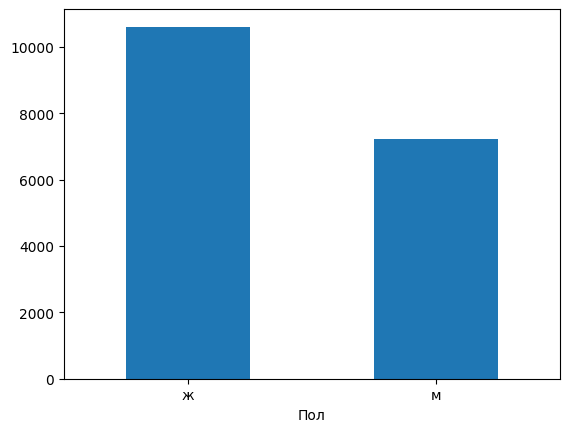

In [64]:
students_df['Пол'].value_counts().plot(kind='bar', rot=0)

In [81]:
students_df[students_df['Страна'] != "Российская Федерация"][['Специальность', 'Страна']].value_counts()

Специальность                                                 Страна                       
Педагогическое образование (с двумя профилями подготовки)     Туркменистан                     205
Подготовка к обучению по программе бакалавриата/специалитета  Иран                             173
Экономика                                                     Республика Узбекистан            123
Стоматология                                                  Иран                              84
Подготовка к обучению по программе бакалавриата/специалитета  Китайская Народная Республика     77
                                                                                              ... 
Педагогическое образование                                    Республика Турция                  1
Биология                                                      Китайская Народная Республика      1
Педагогическое образование (с двумя профилями подготовки)     Вьетнам                            1
                 

In [73]:
students_df.groupby("Страна")[['Квалификация', 'Специальность']].count()

,Квалификация,Специальность
Страна,,
Азербайджанская Республика,13,13
Алжирская Народная Демократическая Республика,1,1
Ангола,3,3
Афганистан,21,21
Бенин,4,4
Боливарианская Республика Венесуэла,1,1
Бурунди,1,1
ВЕНЕСУЭЛА,1,1
Венгрия,1,1


In [23]:
grade_df.groupby('Страна')[['Балл итоговый', 'Балл сдачи', 'Балл за семестр']].mean()

,Балл итоговый,Балл сдачи,Балл за семестр
Страна,,,
Российская Федерация,77.768608,46.699745,31.085159
